Trong phần này, chúng ta sẽ thảo luận về một số khái niệm chính được sử dụng trong trading

## Danh mục đầu tư và thống kê

Từ trước đến nay, chúng ta chỉ phân tích các cổ phiếu riêng lẻ, bây giờ sẽ tập trung sang việc tìm hiểu danh mục đầu tư gồm nhiều cổ phiếu. 

> 🤔 **Danh mục đầu tư là gì?** 
>
> Danh mục đầu tư chỉ là một tập hợp các phân bổ trong nhiều loại chứng khoán.

Ví dụ bạn đầu tư vào môt danh mục gồm 3 loại cổ phiếu, 20% cho Tesla (TSLA), 30% cho Google (GOOG) và 50% còn lại cho Amazon (AMZN). 

Các tỷ lệ phần trăm này phải cộng lại lên đến 100% (hoặc nếu được xác định là trọng số, chúng phải cộng thêm đến 1).

Một số thống kê chính cho một danh mục đầu tư : 
+ Lợi nhuận hàng ngày : Tỉ lệ lợi nhuận trên cổ phiếu của ngày hôm sau so với ngày hôm trước
+ Lợi nhuận tích lũy : Tỉ lệ lợi nhuận trên cổ phiểu của thời điểm nào đo so với ngày bắt đầu đầu tư. 
+ Lợi nhuận hàng ngày trung bình 
+ Độ lệch chuẩn của lợi nhuận hàng ngày
+ Tỉ lệ Sharpe (thực hiện ở phần sau) 









### Phân bổ danh muc đầu tư

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# Download 4 tập dữ liệu 
!wget https://gist.githubusercontent.com/mthang1801/36bc95e37b7813ab1e8a480fd695b1ce/raw/35af55b462ab113152dd04177f4dfc5bb24142c7/AAPL.csv
!wget https://gist.githubusercontent.com/mthang1801/2a29faf0c269220e83763ba827b00e92/raw/1b1cd8fba33f4c9a8d201c8dc7aba62691077ae0/AMZN.csv
!wget https://gist.githubusercontent.com/mthang1801/c5847179053a366f9513c1ec6082d6ad/raw/5a844335ec5660c15cc94ffc228da02068cf46fc/TSLA.csv
!wget https://gist.githubusercontent.com/mthang1801/e87fcc3a55f4c057275ca7d6b148f7b1/raw/bc11ec9c90e370c7e24f95619b51f5cbd56a9d4d/GOOG.csv

--2021-10-04 13:57:34--  https://gist.githubusercontent.com/mthang1801/36bc95e37b7813ab1e8a480fd695b1ce/raw/35af55b462ab113152dd04177f4dfc5bb24142c7/AAPL.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175233 (171K) [text/plain]
Saving to: ‘AAPL.csv’

AAPL.csv            100%[===================>] 171.13K  --.-KB/s    in 0.01s   

2021-10-04 13:57:35 (11.8 MB/s) - ‘AAPL.csv’ saved [175233/175233]

--2021-10-04 13:57:35--  https://gist.githubusercontent.com/mthang1801/2a29faf0c269220e83763ba827b00e92/raw/1b1cd8fba33f4c9a8d201c8dc7aba62691077ae0/AMZN.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199

In [3]:
# Đồng bộ tất cả các tập dữ liệu bằng cách giới hạn ngày bắt đầu và ngày kết thúc 
start_date = pd.to_datetime("2018-01-01") 
end_date = pd.to_datetime("2021-10-01")

In [4]:
AAPL = pd.read_csv("AAPL.csv", parse_dates=True, index_col=["Date"])[start_date:end_date]
GOOG = pd.read_csv("GOOG.csv", parse_dates=True, index_col=["Date"])[start_date:end_date]
TSLA = pd.read_csv("TSLA.csv", parse_dates=True, index_col=["Date"])[start_date:end_date]
AMZN = pd.read_csv("AMZN.csv", parse_dates=True, index_col=["Date"])[start_date:end_date]

Dữ liệu đã được load thành công, để đơn giản hóa dữ liệu, chúng ta sẽ xét giá cổ phiếu vào thời điểm đóng cửa làm đơn vị để thực hiện các phép tính phân tích và thống kể dữ liệu

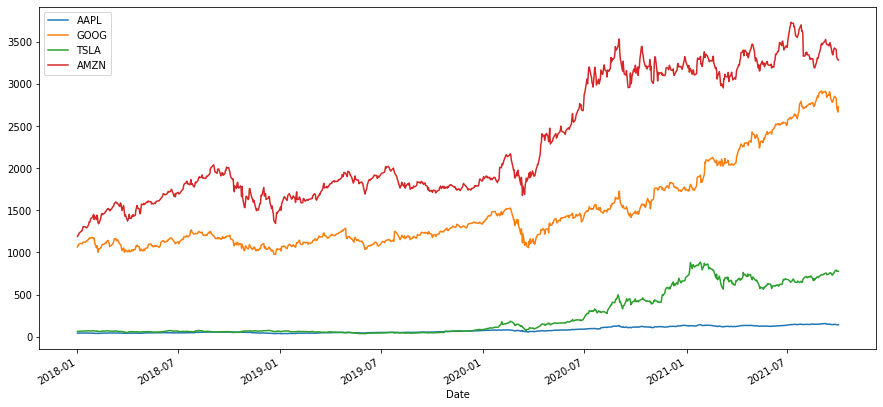

In [5]:
AAPL["Close"].plot(figsize=(15,7), label="AAPL")
GOOG["Close"].plot(label="GOOG")
TSLA["Close"].plot(label="TSLA")
AMZN["Close"].plot(label="AMZN")
plt.legend()

In [6]:
stock_companies = ["AAPL", "GOOG", "TSLA", "AMZN"] 

Tỉ lệ lợi nhuận hàng ngày của từng công ty : 

In [7]:
for stock_name in stock_companies : 
  stock_df = eval(stock_name) 
  stock_df["Daily Return"] = stock_df["Close"] / stock_df["Close"].shift(1)

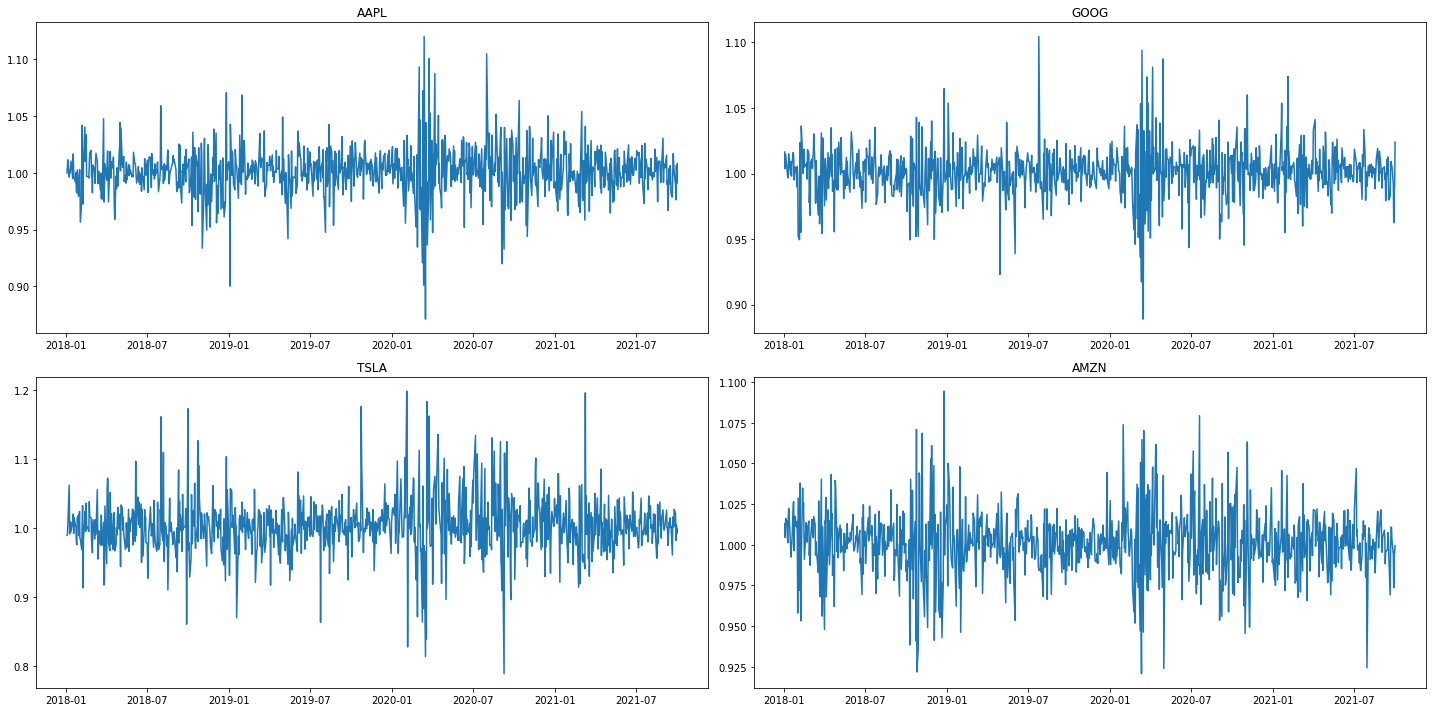

In [8]:
fig, axes = plt.subplots(2,2,figsize=(20,10))

for i, ax in enumerate(axes.flat):
  stock_df = eval(stock_companies[i])
  ax.plot(stock_df["Daily Return"])
  ax.set_title(stock_companies[i])

plt.tight_layout()

Tỉ lệ lợi nhuận tích lũy của từng công ty : 

In [9]:
for stock_name in stock_companies : 
  stock_df = eval(stock_name)
  stock_df["Cummulative Return"] = stock_df["Close"] / stock_df["Close"][0]

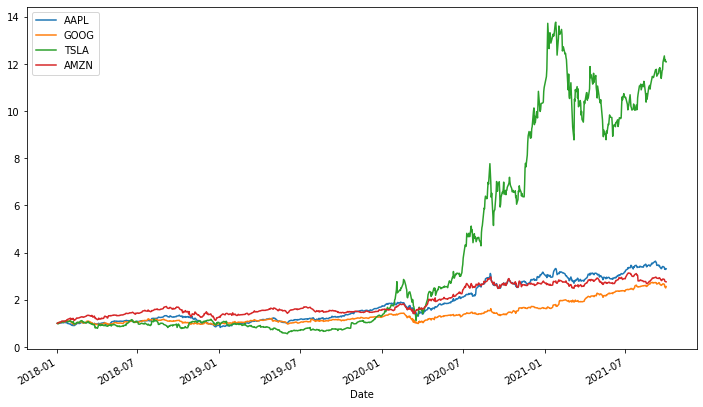

In [10]:
AAPL["Cummulative Return"].plot(figsize=(12,7), label="AAPL")
GOOG["Cummulative Return"].plot(label="GOOG")
TSLA["Cummulative Return"].plot(label="TSLA")
AMZN["Cummulative Return"].plot(label="AMZN")
plt.legend()

Giả sử đầu tư 1.000.000$ vào danh mục đầu tư hiện tại gồm : 
- 20% AAPL
- 25% GOOG
- 30% TSLA 
- 25% AMZN 

Chúng ta sẽ tính toán xem lợi nhuận đầu tư vào danh mục ở thời điểm hiện tại sẽ là bao nhiêu : 




In [11]:
for stock_name, allocate in zip(stock_companies, (0.2, 0.25, 0.3, 0.25)) : 
  stock_df = eval(stock_name)
  stock_df["Allocation"] = stock_df["Cummulative Return"] * allocate 

In [12]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Cummulative Return,Allocation
Date,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.248268,102223600,NaN,1.000000,0.200000
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.241093,118071600,0.999826,0.999826,0.199965
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.432655,89738400,1.004645,1.004470,0.200894
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.904377,94640000,1.011385,1.015906,0.203181
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.748737,82271200,0.996286,1.012133,0.202427


**Khoản đầu tư (investment)** 

Từ tỉ lệ phân bổ danh mục đầu tư trong mỗi cổ phiếu ban đầu, sau đó khoản đầu tư sẽ sinh ra lợi nhuận theo thời gian. Dựa vào tỉ lệ lợi nhuận có được, chúng ta sẽ tính thành tiền đạt được tại một thời điểm bất kỳ từ khoản đầu tư 1.000.000$ ban đầu 

In [13]:
for stock_name in stock_companies : 
  stock_df = eval(stock_name) 
  stock_df["Position values"] = stock_df["Allocation"] * 1e6 

In [14]:
AAPL

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Cummulative Return,Allocation,Position values
Date,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.248268,102223600,NaN,1.000000,0.200000,200000.000000
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.241093,118071600,0.999826,0.999826,0.199965,199965.168930
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.432655,89738400,1.004645,1.004470,0.200894,200894.002111
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.904377,94640000,1.011385,1.015906,0.203181,203181.242382
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.748737,82271200,0.996286,1.012133,0.202427,202426.578484
...,...,...,...,...,...,...,...,...,...,...
2021-09-27,145.470001,145.960007,143.820007,145.369995,145.369995,74150700,0.989450,3.375595,0.675119,675118.998610
2021-09-28,143.250000,144.750000,141.690002,141.910004,141.910004,108972300,0.976199,3.295252,0.659050,659050.306724
2021-09-29,142.470001,144.449997,142.029999,142.830002,142.830002,74602000,1.006483,3.316615,0.663323,663322.908704


### Thống kê danh mục 

#### Tổng giá trị danh mục 

In [15]:
portfolio_df = pd.DataFrame({
    "AAPL" : AAPL["Position values"], 
    "GOOG" : GOOG["Position values"], 
    "TSLA" : TSLA["Position values"], 
    "AMZN" : AMZN["Position values"], 
})
portfolio_df

,AAPL,GOOG,TSLA,AMZN
Date,,,,
2018-01-02,200000.000000,250000.000000,3.000000e+05,250000.000000
2018-01-03,199965.168930,254103.281690,2.969301e+05,253193.821093
2018-01-04,200894.002111,255023.479812,2.944685e+05,254327.120005
2018-01-05,203181.242382,258739.431925,2.963030e+05,258437.692842
2018-01-08,202426.578484,259845.056573,3.148629e+05,262165.579876
...,...,...,...,...
2021-09-27,675118.998610,664323.948357,3.703366e+06,716099.952977
2021-09-28,659050.306724,639361.486385,3.638786e+06,697210.270122
2021-09-29,663322.908704,631553.972300,3.656335e+06,694090.060058


In [16]:
portfolio_df["Total values"] = portfolio_df.sum(axis=1)
portfolio_df

,AAPL,GOOG,TSLA,AMZN,Total values
Date,,,,,
2018-01-02,200000.000000,250000.000000,3.000000e+05,250000.000000,1.000000e+06
2018-01-03,199965.168930,254103.281690,2.969301e+05,253193.821093,1.004192e+06
2018-01-04,200894.002111,255023.479812,2.944685e+05,254327.120005,1.004713e+06
2018-01-05,203181.242382,258739.431925,2.963030e+05,258437.692842,1.016661e+06
2018-01-08,202426.578484,259845.056573,3.148629e+05,262165.579876,1.039300e+06
...,...,...,...,...,...
2021-09-27,675118.998610,664323.948357,3.703366e+06,716099.952977,5.758909e+06
2021-09-28,659050.306724,639361.486385,3.638786e+06,697210.270122,5.634408e+06
2021-09-29,663322.908704,631553.972300,3.656335e+06,694090.060058,5.645302e+06


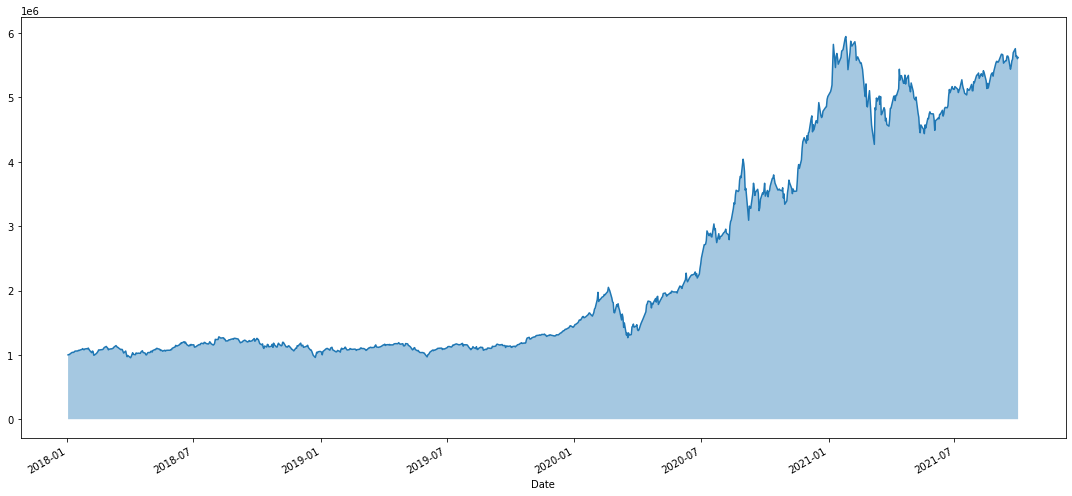

In [17]:
portfolio_df["Total values"].plot(figsize=(15,7))
plt.fill_between(portfolio_df.index, portfolio_df["Total values"],alpha=0.4)
plt.tight_layout()

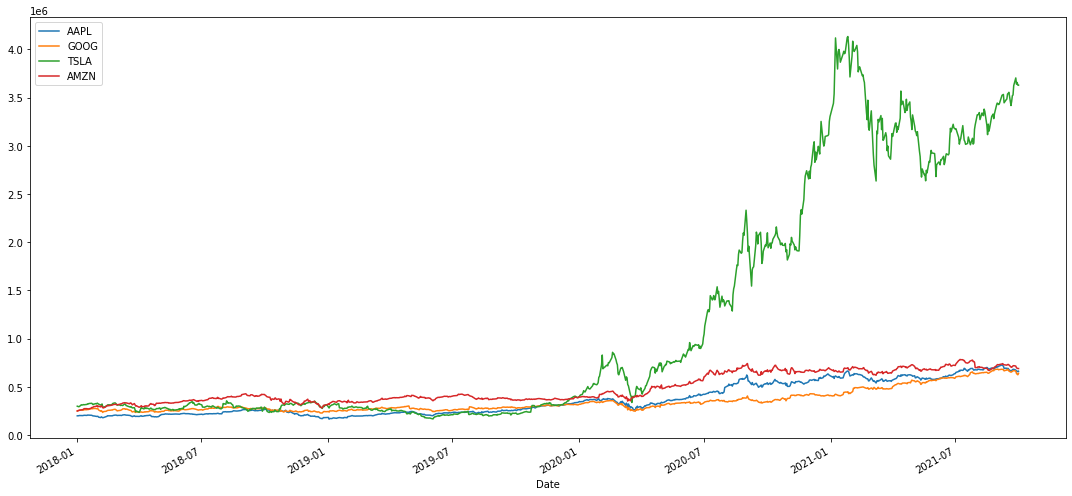

In [18]:
portfolio_df.drop(["Total values"],axis=1).plot(figsize=(15,7))
plt.tight_layout()

#### Lợi nhuận hàng ngày trên danh mục   

In [19]:
portfolio_df["Daily Return"] = portfolio_df["Total values"].pct_change(1)

Text(0.5, 1.0, 'Lợi nhuận hàng ngày trên tổng danh mục đầu tư')

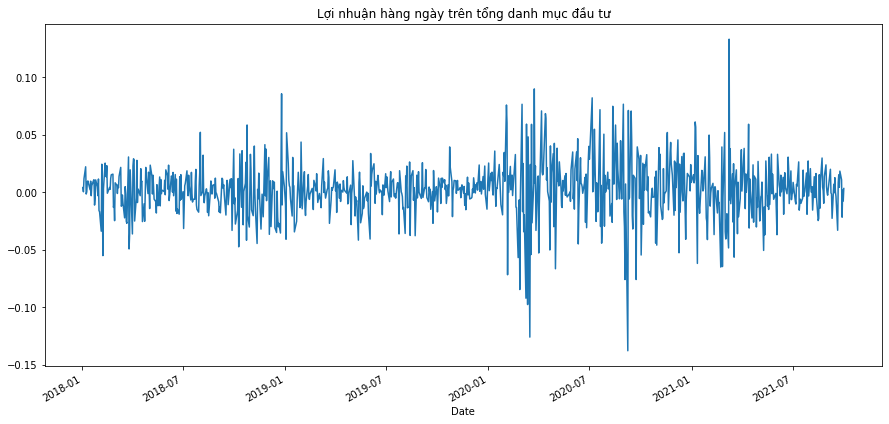

In [20]:
portfolio_df["Daily Return"].plot(figsize=(15,7))
plt.title("Lợi nhuận hàng ngày trên tổng danh mục đầu tư")

#### Lợi nhuận tích lũy trên danh mục

Chúng ta sẽ tỉ lệ tính lợi nhuận đầu tư tích lũy từ thời điểm bắt đầu đầu tư (01-01-2018) và thời điểm kết thúc đầu tư như giả định (01-10-2021) 

In [21]:
cum_ret = (portfolio_df["Total values"][-1] / portfolio_df["Total values"][0] - 1) * 100 
print(f"Lợi nhuận đạt được sau khoảng thời gian đầu tư : {cum_ret:.2f}%")

Lợi nhuận đạt được sau khoảng thời gian đầu tư : 462.13%


#### Lợi nhuận trung bình hàng ngày

In [22]:
avg_mean_daily_return = portfolio_df["Daily Return"].mean()
print(f"Tỉ suất lợi nhuận trung bình ngày : {avg_mean_daily_return*100:.2f}%")

Tỉ suất lợi nhuận trung bình ngày : 0.21%


#### Độ lệch chuẩn lợi nhuận hàng ngày 

In [23]:
std_daily_return = portfolio_df["Daily Return"].std()
print(f"Độ lệch chuẩn tỉ suất lợi nhuận ngày : {std_daily_return}")

Độ lệch chuẩn tỉ suất lợi nhuận ngày : 0.023751064993833115


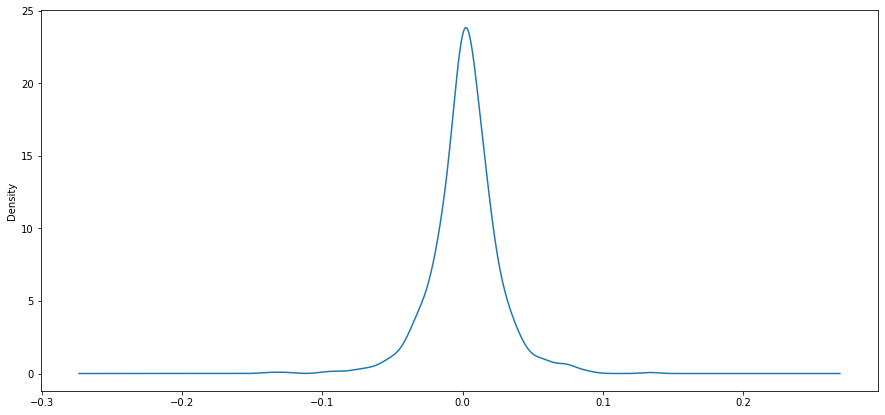

In [24]:
portfolio_df["Daily Return"].plot.kde(figsize=(15,7))

### Tỉ lệ Sharpe 

Tỉ lệ Sharpe là một công cụ đo lường để tính toán lợi nhuận được điều chỉnh theo rủi ro. Tỉ lệ này được phát triển bởi **William F. Sharpe** và được sử dụng để giúp các nhà đầu tư hiểu được lợi tức của khoản đầu tư so với rủi ro của nó. Tỉ lệ này là lợi nhuận trung bình kiếm được vượt quá lợi nhuận phi rủi ro trên mỗi đơn vị rủi ro. 

> 🔑**Note** : Lãi suất phi rủi ro là lãi suất được giả định sẽ thu về được khi đầu tư vào một tài sản tài chính không có rủi ro vỡ nợ. Trên thực tế sẽ không có tài sản nào không có rủi ro vỡ nợ, khái niệm này chỉ là giả định. Người ta thường sử dụng trái phiếu kho bạc (thường là 10 năm) thay cho tài sản này và sử dụng lãi suất của trái phiếu đó làm lợi suất phi rủi ro. Lý do cơ bản cho việc dùng loại trái phiếu này là vì Nhà nước ít khi bị vỡ nợ. 
> 
> Tất nhiên, một tài sản tài chính dù không có rủi ro vỡ nợ vẫn có thể phải đối mặt với nhiều loại rủi ro khác như rủi ro thị trường (rủi ro thay đổi lãi suất chung toàn thị trường), rủi ro thanh khoản (rủi ro không bán được tài sản nhanh với chi phí thấp),...


Công thức : 

### $S(x) = \frac{r_x - R_f}{\sigma(r_x)}$

với : 
+ $x$ : khoản đầu tư vào danh mục x
+ $r_x$ : Lợi nhuận trung bình của danh mục x
+ ${R_f}$ : Lãi suất phi rủi ro
+ $\sigma(r_x)$ : Độ lệch chuẩn (độ biến động) của $r_x$

Đó là công thức tính tỉ lệ **Sharpe**, ngoài ra chúng ta còn có tỉ lệ Sharpe hàng năm : 

$ASR (Annualized Sharpe Ratio) = K-values * SR$

K-values đại diện cho lãi suất của  mẫu dữ liệu : 
+ Daily : sqrt(252) 
+ Weekly : sqrt(52)
+ Monthly : sqrt(12) 

Lãi suất phi rủi ro ở mỗi quốc gia là không giống nhau, nó tùy thuộc vào nhiều yếu tố kinh tế của quốc gia đo. Giả sử tại Việt Nam có tỷ giá cao hơn cho đơn vị tiền tệ giao dịch, bạn có thể sử dụng thủ thuật này để chuyển đổi tỷ giá hàng năm với tỷ giá hàng ngày:

$r_d = (1 + r_y)^{(1/252)} - 1$

với : 
+ $r_d$ : Lãi suất hàng ngày
+ $r_y$ : Lãi suất hàng năm














In [25]:
SR = portfolio_df["Daily Return"].mean() / portfolio_df["Daily Return"].std()
SR

0.08897871257266678

In [26]:
ASR = (252**0.5) * SR
ASR

1.412493272675835

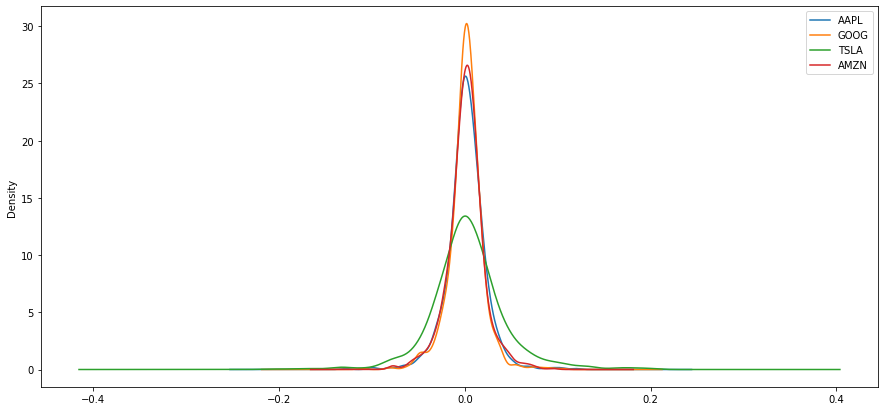

In [27]:
plt.figure(figsize=(15,7))
AAPL["Adj Close"].pct_change(1).plot.kde(label="AAPL")
GOOG["Adj Close"].pct_change(1).plot.kde(label="GOOG")
TSLA["Adj Close"].pct_change(1).plot.kde(label="TSLA")
AMZN["Adj Close"].pct_change(1).plot.kde(label="AMZN")
plt.legend()

## Tối ưu hóa danh mục đầu tư

Bây giờ chúng ta đã có một số liệu tốt để đánh giá phân bổ danh mục đầu tư so với nhau, nhưng làm cách nào chúng ta có thể tối ưu hóa việc nắm giữ danh mục đầu tư. Chúng ta chỉ có thể đoán và kiểm tra một loạt các phân bổ ngẫu nhiên và xem cái nào có Tỷ lệ Sharpe tốt nhất. 





### Phương pháp Monte Carlo

Phương pháp Monte Carlo là một kĩ thuật được sử dụng để hiểu tác động của rủi ro và sự không chắc chắn trong các mô hình dự đoán và dự báo.

Phương pháp Monte Carlo có thể được sử dụng để giải quyết một loạt các vấn đề trong hầu hết mọi lĩnh vực như tài chính, kĩ thuật, chuỗi cung ứng và khoa học. 

Phương pháp Monte Carlo cũng được gọi là phương pháp mô phỏng nhiều xác suất.

Chúng ta sẽ chỉ định ngẫu nhiên trọng số cho mỗi chứng khoán trong danh mục đầu tư của mình, sau đó tính toán lợi nhuận trung bình và độ lêch lợi nhuận hàng ngày.

Điều này cho phép chúng ta tính toán tỷ lệ Sharpe cho hàng ngàn phân bổ được chọn ngẫu nhiên. Sau đó vẽ biểu đồ phân bổ, trên đó cho thấy tỉ lệ lợi nhuận so với độ biến động được tô màu theo tỷ lệ Sharpe. Tuy nhiên, việc dự đoán và kiểm tra này không phải là cách tối ưu vì quá trình phân bổ danh mục đều là ngẫu nhiên, thay vào đó chúng ta có thể sử dụng toán học để tìm ra Tỷ lệ Sharpe tối ưu cho bất kỳ danh mục đầu tư nhất định nào.









In [28]:
stocks = pd.DataFrame({
                       "AAPL" : AAPL["Close"], 
                       "GOOG" : GOOG["Close"], 
                       "TSLA" : TSLA["Close"], 
                       "AMZN" : AMZN["Close"]
})
stocks

,AAPL,GOOG,TSLA,AMZN
Date,,,,
2018-01-02,43.064999,1065.000000,64.106003,1189.010010
2018-01-03,43.057499,1082.479980,63.450001,1204.199951
2018-01-04,43.257500,1086.400024,62.924000,1209.589966
2018-01-05,43.750000,1102.229980,63.316002,1229.140015
2018-01-08,43.587502,1106.939941,67.281998,1246.869995
...,...,...,...,...
2021-09-27,145.369995,2830.020020,791.359985,3405.800049
2021-09-28,141.910004,2723.679932,777.559998,3315.959961
2021-09-29,142.830002,2690.419922,781.309998,3301.120117


In [29]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

AAPL    0.001491
GOOG    0.001170
TSLA    0.003487
AMZN    0.001274
dtype: float64

In [30]:
stocks.pct_change(1).corr()

,AAPL,GOOG,TSLA,AMZN
AAPL,1.000000,0.677533,0.421661,0.650101
GOOG,0.677533,1.000000,0.375684,0.670960
TSLA,0.421661,0.375684,1.000000,0.395003
AMZN,0.650101,0.670960,0.395003,1.000000


### Lợi nhuận hàng ngày phương pháp số học



In [31]:
stocks_daily_ret = stocks.pct_change(1)
stocks_daily_ret

,AAPL,GOOG,TSLA,AMZN
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.016413,-0.010233,0.012775
2018-01-04,0.004645,0.003621,-0.008290,0.004476
2018-01-05,0.011385,0.014571,0.006230,0.016163
2018-01-08,-0.003714,0.004273,0.062638,0.014425
...,...,...,...,...
2021-09-27,-0.010550,-0.007936,0.021914,-0.005757
2021-09-28,-0.023801,-0.037576,-0.017438,-0.026379
2021-09-29,0.006483,-0.012211,0.004823,-0.004475


### Lợi nhuận hang ngày theo phương pháp Logarith

Bây giờ chúng ta sẽ chuyển sang sử dụng trả về logarith thay vì trả về số học, đối với nhiều trường hợp, chúng gần như giống nhau, nhưng hầu hết các phân tích kỹ thuật yêu cầu giảm bớt / chuẩn hóa chuỗi thời gian thường sử dụng trả về  logarith. Trả về logarith rất thuận tiện để làm việc với nhiều thuật toán mà chúng ta sẽ gặp phải.



In [32]:
log_ret = np.log(stocks / stocks.shift(1))
log_ret

,AAPL,GOOG,TSLA,AMZN
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.016280,-0.010286,0.012694
2018-01-04,0.004634,0.003615,-0.008325,0.004466
2018-01-05,0.011321,0.014466,0.006210,0.016033
2018-01-08,-0.003721,0.004264,0.060755,0.014322
...,...,...,...,...
2021-09-27,-0.010606,-0.007968,0.021677,-0.005773
2021-09-28,-0.024089,-0.038300,-0.017592,-0.026733
2021-09-29,0.006462,-0.012287,0.004811,-0.004485


Có thể thấy so với kết quả tính toán ở phần số học, phép tính trên logarith cũng không thay đổi quá nhiều. 



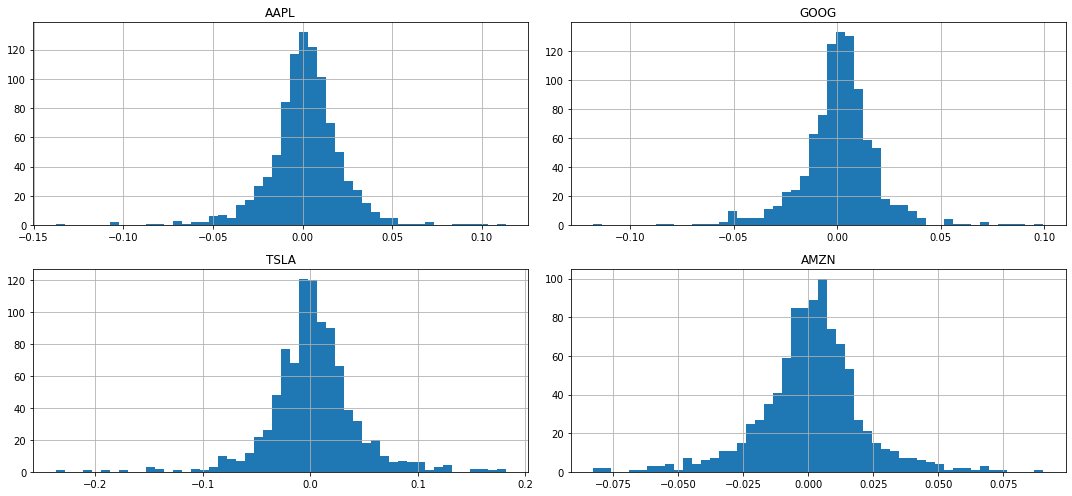

In [33]:
log_ret.hist(figsize=(15,7), bins=50)
plt.tight_layout()

In [34]:
log_ret.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,944.0,0.001269,0.021066,-0.137708,-0.008012,0.001497,0.012044,0.113157
GOOG,944.0,0.000997,0.018619,-0.117667,-0.006427,0.001695,0.010335,0.099380
TSLA,944.0,0.002640,0.041052,-0.236518,-0.017640,0.001660,0.020707,0.181445
AMZN,944.0,0.001076,0.019867,-0.082535,-0.008102,0.001594,0.011066,0.090254


In [35]:
log_ret.mean() * 252

AAPL    0.319721
GOOG    0.251213
TSLA    0.665400
AMZN    0.271144
dtype: float64

In [36]:
# Tính hiệp phương sai theo cặp của các cột
log_ret.cov()

,AAPL,GOOG,TSLA,AMZN
AAPL,0.000444,0.000268,0.000373,0.000273
GOOG,0.000268,0.000347,0.000294,0.000249
TSLA,0.000373,0.000294,0.001685,0.000326
AMZN,0.000273,0.000249,0.000326,0.000395


In [37]:
log_ret.cov() * 252 # Số ngày trong năm

,AAPL,GOOG,TSLA,AMZN
AAPL,0.111827,0.067412,0.093980,0.068700
GOOG,0.067412,0.087358,0.074190,0.062802
TSLA,0.093980,0.074190,0.424686,0.082067
AMZN,0.068700,0.062802,0.082067,0.099464


### Phân bổ danh mục ngẫu nhiên

In [38]:
print("Cổ phiếu:")
print(stocks.columns)
print("\n")

print("Tạo các trọng số ngẫu nhiên:")
weights = np.random.rand(len(stocks.columns))
print(weights)
print('\n')

print("Cân bằng các trọng số sao cho tổng của chúng là 1:")
weights /= weights.sum()
print(weights)
print("\n")

print("Lợi nhuận trong danh mục kỳ vọng") 
exp_ret = np.sum(log_ret.mean() * weights) * 252
print(exp_ret)
print("\n")

print("Độ biến động kỳ vọng: ")
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print("\n")

print("Tỉ lệ Sharpe: ")
SR = exp_ret / exp_vol
print(SR)

Cổ phiếu:
Index(['AAPL', 'GOOG', 'TSLA', 'AMZN'], dtype='object')


Tạo các trọng số ngẫu nhiên:
[0.65599079 0.83012288 0.34042833 0.86523392]


Cân bằng các trọng số sao cho tổng của chúng là 1:
[0.24370186 0.30839227 0.12646979 0.32143609]


Lợi nhuận trong danh mục kỳ vọng
0.32669725172694275


Độ biến động kỳ vọng: 
0.28916909428244925


Tỉ lệ Sharpe: 
1.1297792820412456


Chúng ta sẽ tạo danh sách các trọng số ngẫu nhiên với các bước tương tự như vậy để tìm xem sự phân bổ nào đem lại tối ưu nhất

In [39]:
%%time
NUM_ALLOCATIONS=20000

all_weights = np.zeros(shape=(NUM_ALLOCATIONS, len(stocks.columns)))
exp_ret_arr = np.zeros(NUM_ALLOCATIONS)
exp_vol_arr = np.zeros(NUM_ALLOCATIONS)
sr_arr = np.zeros(NUM_ALLOCATIONS)

for i in range(NUM_ALLOCATIONS): 
  weights = np.random.rand(len(stocks.columns))
  weights /= weights.sum()
  exp_ret = np.sum(log_ret.mean() * weights) * 252
  exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
  sr = exp_ret / exp_vol 

  all_weights[i] = weights
  exp_ret_arr[i] = exp_ret
  exp_vol_arr[i] = exp_vol
  sr_arr[i] = sr

CPU times: user 19.5 s, sys: 65.9 ms, total: 19.5 s
Wall time: 19.5 s


In [40]:
# Tỉ lệ sharpe đạt lớn nhất trong danh sách tren 
sr_arr.max()

1.1918814828549522

In [41]:
# Vị trí tỉ lệ sharpe đạt lớn nhất 
max_sr_index = sr_arr.argmax()
max_sr_index

7846

In [42]:
all_weights[max_sr_index, :]

array([0.34414533, 0.16487754, 0.30480516, 0.18617198])

In [43]:
max_sr_ret = exp_ret_arr[max_sr_index]
max_sr_ret

0.4047465290942919

In [44]:
max_sr_vol = exp_vol_arr[max_sr_index]
max_sr_vol

0.33958622137898264

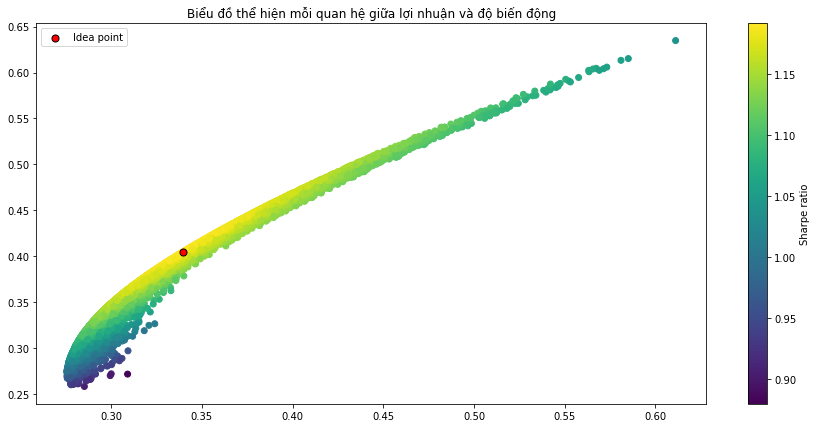

In [45]:
fig, ax = plt.subplots(figsize=(15,7))
cax = ax.scatter(exp_vol_arr, exp_ret_arr, c=sr_arr, cmap="viridis")
ax.set_title("Biểu đồ thể hiện mỗi quan hệ giữa lợi nhuận và độ biến động")
fig.colorbar(cax, label="Sharpe ratio")

ax.scatter(max_sr_vol, max_sr_ret, c="red", s=50,edgecolor="black", label="Idea point" )
plt.legend()

### Tối ưu hóa phân bổ danh mục bằng phương pháp toán học

Có nhiều cách tốt hơn để tìm trọng số phân bổ danh mục  hơn là chỉ đoán và kiểm tra. Chúng ta có thể sử dụng các hàm tối ưu hóa để tìm trọng số lý tưởng về mặt toán học.


In [46]:
def get_ret_vol_sr(weights) : 
  """
  Takes in weights, returns array or return,volatility, sharpe ratio
  """
  weights = np.array(weights) 
  ret = np.sum(log_ret.mean() * weights) * 252 
  vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights))) 
  sr = ret / vol 
  return ret, vol, sr

Để tối ưu hóa danh mục, chúng ta có thể sử dụng thư viện `scipy.optimize.minimize`. Xem thêm tại https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [47]:
from scipy.optimize import minimize

In [48]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [49]:
def neg_sharpe(weights) : 
  return get_ret_vol_sr(weights)[2] * -1 

In [50]:
# Constrain 
def checksum(weights) : 
  """
  Returns 0 if sum of weights is 1.0
  """
  return np.sum(weights) - 1

In [51]:
# Theo quy ước của hàm tối thiểu, nó phải là một hàm trả về 0 cho các điều kiện
cons = ({"type" : "eq", "fun" : checksum})

In [52]:
bounds = tuple([(0,1)for i in range(len(stocks.columns))])
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [53]:
# Initial Guess (equal distribution)
init_guess = [1./len(stocks.columns) for i in range(len(stocks.columns))]
init_guess

[0.25, 0.25, 0.25, 0.25]

In [54]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe, 
                       init_guess, 
                       method="SLSQP",
                       bounds=bounds, 
                       constraints=cons
                      )

In [55]:
opt_results

     fun: -1.1919016612779754
     jac: array([ 8.99881124e-05,  3.75166535e-04,  1.23426318e-04, -7.14242458e-04])
 message: 'Optimization terminated successfully.'
    nfev: 43
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.35115665, 0.1585676 , 0.30715584, 0.1831199 ])

In [56]:
ideal_weights = opt_results.x

In [57]:
ideal_ret, ideal_vol, ideal_sr = get_ret_vol_sr(ideal_weights)

Có thể thấy với `ideal_weights` thì ta được tỉ lệ Sharpe tối ưu

### Tất cả danh mục đầu tư tối ưu (Biên hiệu quả)

Biên hiệu quả là tập hợp các danh mục đầu tư tối ưu mang lại lợi tức kỳ vọng cao nhất với một mức rủi ro xác định hoặc rủi ro thấp nhất để có được một mức lợi nhuận kỳ vọng nhất định. Các danh mục đầu tư nằm dưới biên hiệu quả là dưới mức tối ưu, vì chúng không mang lại đủ lợi nhuận cho mức độ rủi ro. Các danh mục đầu tư nằm ở bên phải của biên hiệu quả cũng là dưới mức tối ưu, vì chúng có mức độ rủi ro cao hơn đối với tỷ suất sinh lợi đã xác định. Xem thêm http://www.investopedia.com/terms/e/efficientfrontier





In [58]:
frontier_y = np.linspace(0.25, 0.8, 100)
frontier_y

array([0.25      , 0.25555556, 0.26111111, 0.26666667, 0.27222222,
       0.27777778, 0.28333333, 0.28888889, 0.29444444, 0.3       ,
       0.30555556, 0.31111111, 0.31666667, 0.32222222, 0.32777778,
       0.33333333, 0.33888889, 0.34444444, 0.35      , 0.35555556,
       0.36111111, 0.36666667, 0.37222222, 0.37777778, 0.38333333,
       0.38888889, 0.39444444, 0.4       , 0.40555556, 0.41111111,
       0.41666667, 0.42222222, 0.42777778, 0.43333333, 0.43888889,
       0.44444444, 0.45      , 0.45555556, 0.46111111, 0.46666667,
       0.47222222, 0.47777778, 0.48333333, 0.48888889, 0.49444444,
       0.5       , 0.50555556, 0.51111111, 0.51666667, 0.52222222,
       0.52777778, 0.53333333, 0.53888889, 0.54444444, 0.55      ,
       0.55555556, 0.56111111, 0.56666667, 0.57222222, 0.57777778,
       0.58333333, 0.58888889, 0.59444444, 0.6       , 0.60555556,
       0.61111111, 0.61666667, 0.62222222, 0.62777778, 0.63333333,
       0.63888889, 0.64444444, 0.65      , 0.65555556, 0.66111

In [59]:
def minimize_volatility(weights) : 
  return get_ret_vol_sr(weights)[1] 

In [61]:
frontier_volatilities = []

for possible_return in frontier_y : 
  cons = ({"type" : "eq" , 
           "fun" : checksum, 
           }, 
          {"type" : "eq", 
           "fun" : lambda w : get_ret_vol_sr(w)[0] - possible_return}) 
  result = minimize(minimize_volatility, 
                    x0=init_guess, 
                    method="SLSQP",
                    bounds=bounds, 
                    constraints=cons
                    )
  frontier_volatilities.append(result.fun)

In [62]:
frontier_volatilities[:5]

[0.295564366106572,
 0.28207111957583203,
 0.27722410141720377,
 0.27557118982514406,
 0.27538779770039645]

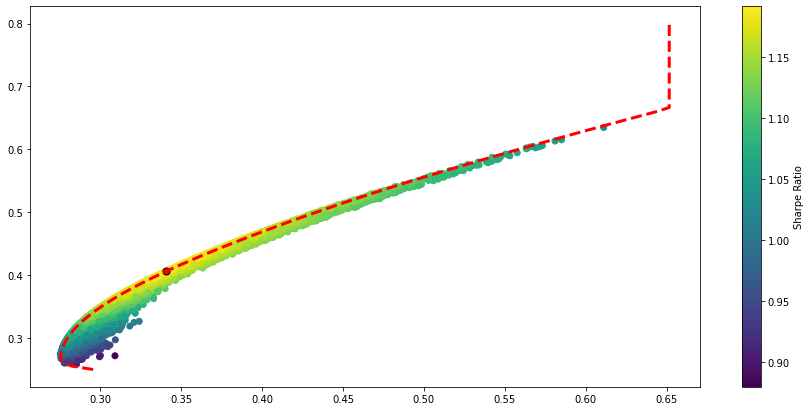

In [63]:
fig, ax = plt.subplots(figsize=(15,7)) 
cax = ax.scatter(exp_vol_arr, exp_ret_arr, c=sr_arr, cmap="viridis")
fig.colorbar(cax,label="Sharpe Ratio")
ax.scatter(ideal_vol, ideal_ret,c="red",s=50,edgecolor="black")
plt.plot(frontier_volatilities,frontier_y, color="red", linestyle="--", linewidth=3)